<a href="https://colab.research.google.com/github/Deryababul/nlp/blob/main/Duygu_Analizi_Uygulamas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn nltk matplotlib

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("winvoker/turkishsentimentanalysisdataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/turkishsentimentanalysisdataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



📊 Sınıflandırma Raporu:

              precision    recall  f1-score   support

    Negative       0.59      0.66      0.62      5656
        Notr       0.97      0.86      0.91     17092
    Positive       0.85      0.89      0.87     26217

    accuracy                           0.85     48965
   macro avg       0.80      0.80      0.80     48965
weighted avg       0.86      0.85      0.86     48965



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


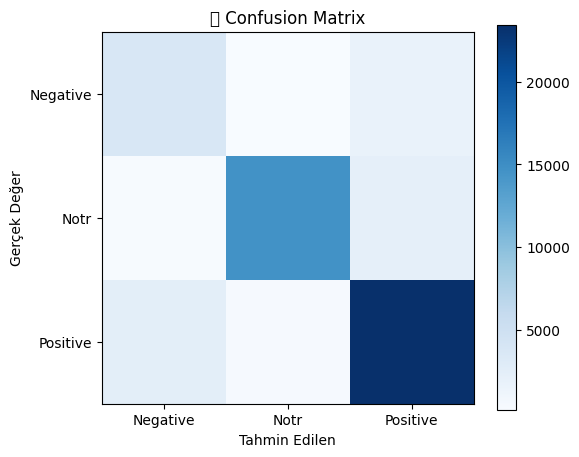

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# NLTK stopwords indir
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("turkish"))

# Metin temizleme fonksiyonu
def temizle(metin):
    metin = re.sub(r"http\S+", "", metin)
    metin = re.sub(r"@\S+", "", metin)
    metin = re.sub(r"[^a-zA-ZçÇğĞıİöÖşŞüÜ ]", " ", metin)
    metin = metin.lower()
    kelimeler = metin.split()
    kelimeler = [k for k in kelimeler if k not in stop_words]
    return " ".join(kelimeler)

# 📥 Eğitim ve test verilerini yükle
train_df = pd.read_csv("/kaggle/input/turkishsentimentanalysisdataset/train.csv")
test_df = pd.read_csv("/kaggle/input/turkishsentimentanalysisdataset/test.csv")

# Boşları ve gereksiz sütunları temizle
train_df = train_df[['text', 'label']].dropna()
test_df = test_df[['text', 'label']].dropna()

# Metinleri temizle
train_df["temiz_text"] = train_df["text"].apply(temizle)
test_df["temiz_text"] = test_df["text"].apply(temizle)

# Etiketleri dönüştür (Label Encoding)
label_mapping = {"Negative": 0, "Notr": 1, "Positive": 2}
train_df["etiket"] = train_df["label"].map(label_mapping)
test_df["etiket"] = test_df["label"].map(label_mapping)

# Özellik çıkarımı (CountVectorizer)
vectorizer = CountVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(train_df["temiz_text"]).toarray()
y_train = train_df["etiket"]
X_test = vectorizer.transform(test_df["temiz_text"]).toarray()
y_test = test_df["etiket"]

# Modeli oluştur ve eğit
model = MultinomialNB()
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Sonuçları yazdır
print("\n📊 Sınıflandırma Raporu:\n")
etiket_isimleri = ["Negative", "Notr", "Positive"]
print(classification_report(y_test, y_pred, target_names=etiket_isimleri))

# 🔍 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.title("🔵 Confusion Matrix")
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1, 2], etiket_isimleri)
plt.yticks([0, 1, 2], etiket_isimleri)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")a
plt.show()
